## What is GBM?

Let’s start by understanding Boosting! Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. For example, if we are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices. Similarly, if our goal is to classify credit defaults, then the loss function would be a measure of how good our predictive model is at classifying bad loans. One of the biggest motivations of using gradient boosting is that it allows one to optimise a user specified cost function, instead of a loss function that usually offers less control and does not essentially correspond with real world applications.




## Advantages
- Often provides predictive accuracy that cannot be beat.
- Lots of flexibility - can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.
- No data pre-processing required - often works great with categorical and numerical values as is.
- Handles missing data - imputation not required.

## Disdvantages
- GBMs will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting. Must use cross-validation to neutralize.
- Computationally expensive - GBMs often require many trees (>1000) which can be time and memory exhaustive.
- The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
- Less interpretable although this is easily addressed with various tools (variable importance, partial dependence plots, LIME, etc.).


## Hyperparameters
- Number of trees: The total number of trees to fit. GBMs often require many trees; however, unlike random forests GBMs can overfit so the goal is to find the optimal number of trees that minimize the loss function of interest with cross validation.
- Depth of trees: The number d of splits in each tree, which controls the complexity of the boosted ensemble. Often d = 1  works well, in which case each tree is a stump consisting of a single split. More commonly, d is greater than 1 but it is unlikely d > 10 will be required.
- Learning rate: Controls how quickly the algorithm proceeds down the gradient descent. Smaller values reduce the chance of overfitting but also increases the time to find the optimal fit. This is also called shrinkage.
- Subsampling: Controls whether or not you use a fraction of the available training observations. Using less than 100% of the training observations means you are implementing stochastic gradient descent. This can help to minimize overfitting and keep from getting stuck in a local minimum or plateau of the loss function gradient.



## Tuning a GBM Model and Early Stopping
Hyperparameter tuning is especially significant for gbm modelling since they are prone to overfitting. The special process of tuning the number of iterations for an algorithm such as gbm and random forest is called “Early Stopping”. Early Stopping performs model optimisation by monitoring the model’s performance on a separate test data set and stopping the training procedure once the performance on the test data stops improving beyond a certain number of iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit. In the context of gbm, early stopping can be based either on an out of bag sample set (“OOB”) or cross- validation (“cv”). Like mentioned above, the ideal time to stop training the model is when the validation error has decreased and started to stabilise before it starts increasing due to overfitting.



## Comparison with Other Models

### GBM vs Random Forest
Every algorithm consists of two steps:
- Producing a distribution of simple ML models on subsets of the original data.
- Combining the distribution into one "aggregated" model.

Now, Random Forest uses Bagging(Bootstrapped Aggregating) for sampling.
- It aims to decrease variance not bias.
- It is low bias- high variance model.
- It doesn’t overfit.
- It uses parallel ensembling.
- In final prediction, It uses simple majority vote for classification.

while GBT uses Boosting method for sampling.
- It aims to decrease bias not variance.
- It is high bias-low variance algorithm.
- It overfits.
- It uses sequential ensembling.
- In final prediction, It uses weighted majority vote for classification.

### GBM vs Neural Net
Gradient Boosting (LGB, XGB, Catboost):
- work well on categorical features
- easy to tune
- work well on small datasets like we have here
- hard to include information from images
- run on CPU hence 6h time

Neural Net:
- hard to include categorical features
- work well with images and text
- need GPU hence only 2h time
- hard to combine different features (categorical, numerical, images)
- not good on small datasets

In [49]:
# Import the necessary packages
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [50]:
# Import and read dataset
input_ = "heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(input_)

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


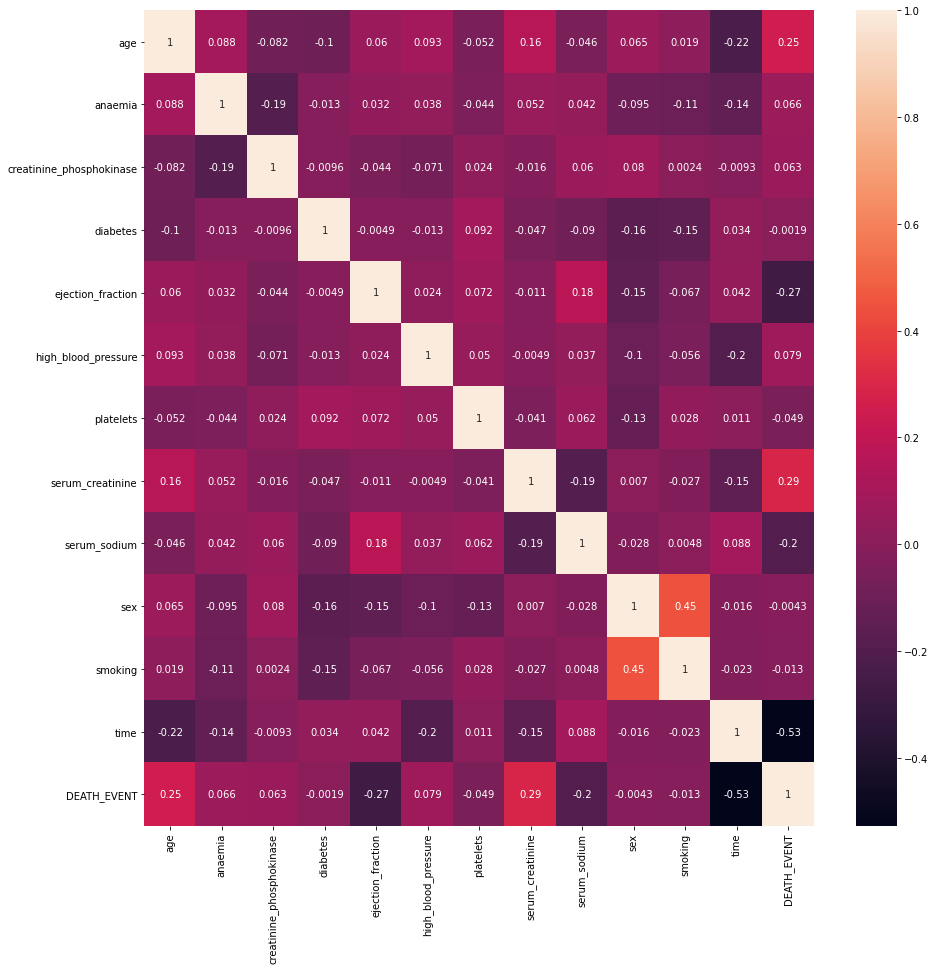

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


[5.01495484e-02 0.00000000e+00 5.91510834e-02 4.79210607e-04
 9.30167233e-02 1.69379372e-03 4.48538284e-02 1.05117014e-01
 5.96304040e-02 7.54845765e-03 3.23829613e-03 5.75121640e-01]


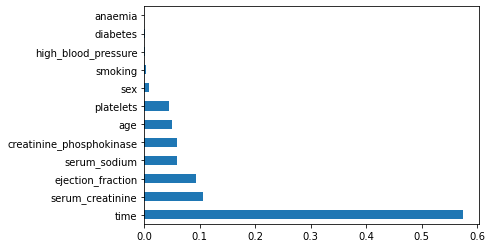

In [53]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = GradientBoostingClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

When we examine the graph above, we can predict that time, serum_creatinine, ejection_fraction  values will increase accuracy in education.

In [54]:
# Delete outlier
df = df[df['ejection_fraction']<70]

In [69]:
#inp_data = df.drop(df[['DEATH_EVENT']], axis=1)
inp_data = df.iloc[:,[4,7,11]]
out_data = df[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0, shuffle=True)

## Applying Transformer
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [70]:
## X_train, X_test, y_train, y_test Shape

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (237, 3)
X_test Shape  :  (60, 3)
y_train Shape :  (237, 1)
y_test Shape  :  (60, 1)


In [71]:
## I coded this method for convenience and to avoid writing the same code over and over again

def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score    : {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('GBM f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
    print('GBM precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
    print('GBM recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
    print("GBM roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
    print("\n",classification_report(y_pred, y_test))
    
    plt.figure(figsize=(6,6))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
    plt.title("GBM Confusion Matrix (Rate)")
    plt.show()
    
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, cmap="Blues",
                xticklabels=["FALSE","TRUE"],
                yticklabels=["FALSE","TRUE"],
                cbar=False)
    plt.title("GBM Confusion Matrix (Number)")
    plt.show()
    
def sample_result(
    loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None
):    
    
    scores = [] 
    for i in range(0,500): # 500 samples
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2)
        clf = GradientBoostingClassifier(
            loss=loss,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            criterion=criterion,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_depth=max_depth,
            max_features=max_features
        ) 
        sc=StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 
    
    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

---

## Simple Metod
I applied GBM directly without changing anything and the result is as follows:

Accuracy Score    : 0.8833
GBM f1-score      : 0.8108
GBM precision     : 0.7500
GBM recall        : 0.8824
GBM roc auc score : 0.8830

               precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.88      0.75      0.81        20

    accuracy                           0.88        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.88      0.88      0.88        60



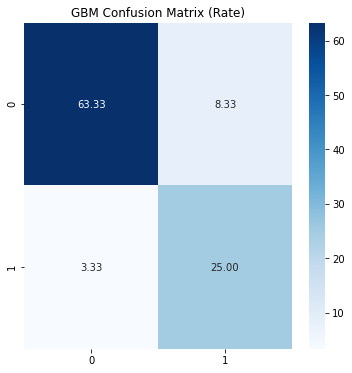

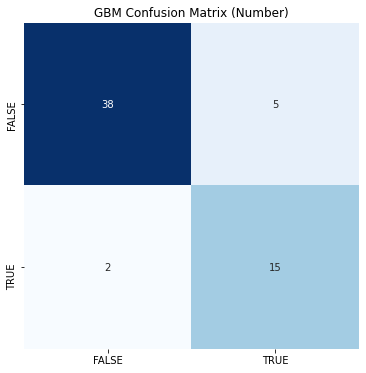

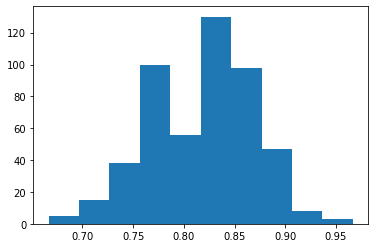

Best Score: 0.9666666666666667
Mean Score: 0.8167333333333333


In [72]:
clf = GradientBoostingClassifier(random_state=0)
result(clf)
sample_result()

## Advanced Method

### Parameters in param_grid
1. learning_rate:

* Values: [0.1, 0.5, 0.01]
* Definition: Determines the step size at each iteration when optimizing the loss function.
* Impact: Smaller values (e.g., 0.01) make the model more robust but require more iterations, while larger values (e.g., 0.5) speed up training but may cause overfitting.

2. min_samples_split:

* Values: [1, 3, 5] (Note: 1 may raise a warning or an error in scikit-learn; it should typically be at least 2.)
* Definition: The minimum number of samples required to split an internal node.
* Impact: Larger values prevent the tree from growing too deep, which reduces overfitting but might underfit.

3. max_depth:

* Values: [2, 4, 6]
* Definition: The maximum depth of each tree in the ensemble.
* Impact: Controls the complexity of each weak learner. Shallower trees (e.g., 2) prevent overfitting, while deeper trees (e.g., 6) allow capturing more complex patterns.

4. max_features:

* Values: ["log2", "sqrt"]
* Definition: The maximum number of features to consider for finding the best split.
* "log2": Uses log base 2 of the total number of features.
* "sqrt": Uses the square root of the total number of features.
* Impact: Reduces overfitting by introducing randomness into the tree-building process.

5. criterion:

* Values: ["friedman_mse", "mae"]
* Definition: The function used to measure the quality of a split.
* "friedman_mse": Optimized for Gradient Boosting (default for regression tasks).
* "mae": Mean Absolute Error, more robust to outliers.
* Impact: Different criteria might work better depending on the distribution of the data.

6. subsample:

* Values: [0.1, 0.5, 1]
* Definition: The fraction of samples used for fitting each tree.
* 1: Use all samples (no subsampling).
* 0.5: Use 50% of samples for each tree.
* 0.1: Use 10% of samples for each tree.
* Impact: Subsampling reduces overfitting and speeds up training but may increase variance if too small.

7. n_estimators:

* Values: [500, 1000]
* Definition: The number of weak learners (decision trees) to train.
* Impact: More estimators increase the model's complexity and accuracy but also increase computational cost.


In [15]:
param_grid = {
    "learning_rate": [0.1, 0.5, 0.01],
    "min_samples_split": [1,3,5],
    "max_depth": [2,4,6],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.1, 0.5, 1],
    "n_estimators":[500,1000]
}

clf = GradientBoostingClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=4, verbose=3, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 168 tasks      | elapsed:   42.9s
[Parallel(n_jobs=4)]: Done 392 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 660 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 1072 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 1552 tasks      | elapsed:  9.6min
[Parallel(n_jobs=4)]: Done 2088 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 2734 tasks      | elapsed: 19.1min
[Parallel(n_jobs=4)]: Done 3424 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 4168 tasks      | elapsed: 31.2min
[Parallel(n_jobs=4)]: Done 4320 out of 4320 | elapsed: 33.6min finished


{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 0.5}

Accuracy Score    : 0.9167
GBM f1-score      : 0.8571
GBM precision     : 0.8333
GBM recall        : 0.8824
GBM roc auc score : 0.9063

               precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.88      0.83      0.86        18

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



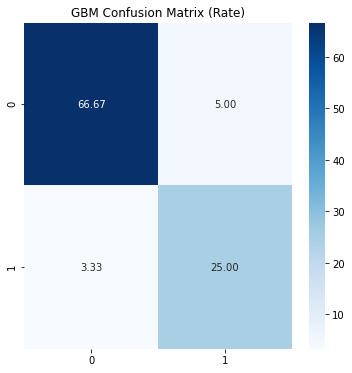

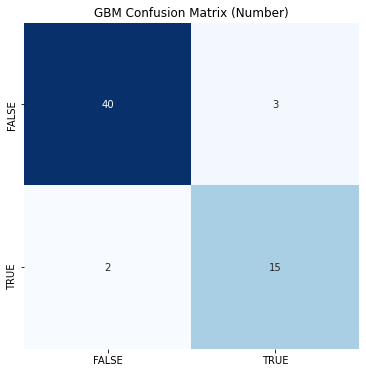

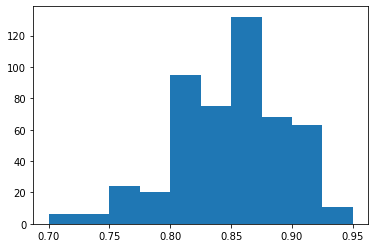

Best Score: 0.95
Mean Score: 0.8457333333333333


In [80]:
clf = GradientBoostingClassifier(
    learning_rate=0.01,
    min_samples_split=5,
    max_depth=2,
    max_features='sqrt',
    criterion='friedman_mse',
    subsample=0.5,
    n_estimators=500,
    random_state=0
)

result(clf)
sample_result(
    learning_rate=0.01,
    min_samples_split=5,
    max_depth=2,
    max_features='sqrt',
    criterion='friedman_mse',
    subsample=0.5,
    n_estimators=500
)

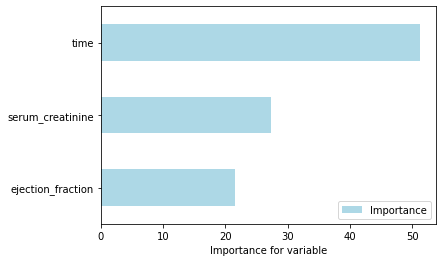

In [75]:
Importance = pd.DataFrame({'Importance':clf.feature_importances_*100},index=df.iloc[:,[4,7,11]].columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='lightblue')
plt.xlabel('Importance for variable');

## Reporting
I evaluated the results I found with Confusion Matrix, the results are as follows:

**Correctly predicted -> %93.33 (278 of 297 predict are correct)**
- True Negative -> %68.33 (41 people) -> Those who were predicted not to die and who did not die
- True Positive -> %25.00 (15 people) -> Those who were predicted to die and who did die

**Wrong predicted-> %6.66 (19 of 297 predict are wrong)**
- False Positive -> %03.33 (2 people) -> Those who were predicted to die but who did not die
- False Negative -> %03.33 (2 people) -> Those who were predicted to not die but who did die